In [1]:
import numpy as np
import matplotlib.pyplot as pyplot
from scipy.spatial.distance import cdist
import math

In [2]:
data = np.array([[2, 4],
                 [1, 2],
                 [3, 1],
                 [7, 5],
                 [6, 6],
                 [6, 4],
                 [8, 5],
                 [2, 2],
                 [3, 2]])

print data

[[2 4]
 [1 2]
 [3 1]
 [7 5]
 [6 6]
 [6 4]
 [8 5]
 [2 2]
 [3 2]]


построим график

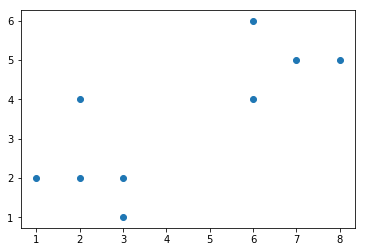

In [3]:
pyplot.scatter(data[:, 0], data[:, 1])
pyplot.show()

Инициализируем центроиды

In [4]:
def initialize(k=2, n=2, low=2, hight=7):
    return np.random.uniform(low=low, high=hight, size=(k,n))

centroids = initialize()
print(centroids)

[[5.30359785 2.26568037]
 [6.75524907 2.0947283 ]]


реализуем функцию пересчета центров кластеров.

In [5]:
def clusterMemberships(x, centroids):
    distances = cdist(x, centroids)
    memberships = distances.argmin(axis=1)
    return memberships

memberships = clusterMemberships(data, centroids)
print(memberships)

[0 0 0 1 0 0 1 0 0]


Реализуйте функцию пересчета центров кластеров.

In [6]:
def recalculateCenters(x, centroids, memberships, k=2):
    centroids = centroids.copy()
    for index in range(k):
        centroids[index, :] = np.mean(x[memberships == index, :], axis=0, dtype=np.float32)
        
    return centroids

centroids = recalculateCenters(data, centroids, memberships)
print(centroids)

[[3.28571439 3.        ]
 [7.5        5.        ]]


Реализуйте алгоритм K-средних.

In [7]:
def kMeans(x, centroids, k, n=2):
    centroidsHistory = []
    centroidsHistory.append(centroids)
    
    iterations = 3
    
    for i in range(iterations):
        memberships = clusterMemberships(x, centroids)
        centroids = recalculateCenters(x, centroids, memberships, k)
        centroidsHistory.append(centroids)

    return centroidsHistory

centroids = initialize()
centroidsHistory = kMeans(data, centroids, 2)
print(centroidsHistory)

[array([[6.07120754, 2.19565533],
       [5.45548029, 4.82626336]]), array([[2.25      , 1.75      ],
       [5.80000019, 4.80000019]]), array([[2.20000005, 2.20000005],
       [6.75      , 5.        ]]), array([[2.20000005, 2.20000005],
       [6.75      , 5.        ]])]


Постройте график, на котором данные разделены на K=3 кластеров (при помощи различных маркеров или цветов), а также траекторию движения центров кластеров в процессе работы алгоритма

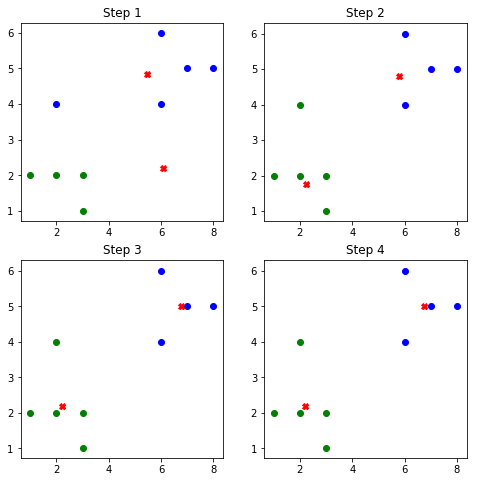

In [8]:
def plotCentroidsHistory(centroidsHistory, k=2):
    pyplot.figure(figsize=(8, 8))
    for i in range(len(centroidsHistory)):
        memberships = clusterMemberships(data, centroidsHistory[i])
        pyplot.subplot(2, 2, i + 1)
        colors = ["green", "blue", "orange"]
        for kIndex, color in zip(range(k), colors):
            pyplot.scatter(data[memberships == kIndex, 0], data[memberships == kIndex, 1], c=color)
        pyplot.plot(centroidsHistory[i][:, 0], centroidsHistory[i][:, 1], 'rX')
        pyplot.title('Step {:}'.format(i + 1));

    pyplot.show()
    
plotCentroidsHistory(centroidsHistory)

In [9]:
lastX = [5, 4]
for centroid in centroidsHistory[-1]:
    print(0.1/math.sqrt((centroid[0]-lastX[0])**2+(centroid[1]-lastX[1])**2))

0.030042089001
0.0496138938357
